## Getting the data

In [53]:
!pip install yfinance
!pip install scikit-learn


In [54]:
import yfinance as yf

In [55]:
sp500 = yf.Ticker("^GSPC")

^GSPC is the symbol for the S&P 500 index

In [56]:
sp500 = sp500.history(period="max")

In [57]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,0.0,0.0
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,0.0,0.0
2023-07-03 00:00:00-04:00,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,0.0,0.0


In [58]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-22 00:00:00-04:00', '2023-06-23 00:00:00-04:00',
               '2023-06-26 00:00:00-04:00', '2023-06-27 00:00:00-04:00',
               '2023-06-28 00:00:00-04:00', '2023-06-29 00:00:00-04:00',
               '2023-06-30 00:00:00-04:00', '2023-07-03 00:00:00-04:00',
               '2023-07-05 00:00:00-04:00', '2023-07-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23992, freq=None)

## Cleaning and Visualising the stock market data

<Axes: xlabel='Date'>

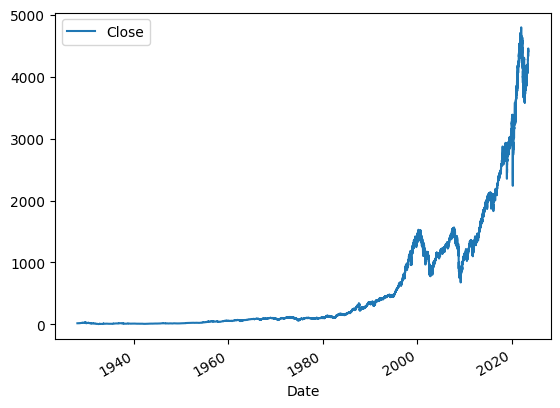

In [59]:
sp500.plot.line(y="Close", use_index=True)

'use_index = True' will allow us to plot the closing prices everyday against the date index.

In [60]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Now, we deleted the columns we did not need

## Setting up our target for Machine Learning

Rather than predicting the actual price of the stock, we can make it more concise by predicting that, on days the stock goes up, will it actually go up? We focus more on the directionality of the stock price, than the price itself.

In [61]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [62]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844
2023-07-03 00:00:00-04:00,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,4446.819824


We created a column called 'Tomorrow' that shows the next days' closing price. Therefore, the last row does not have any data in it yet. 

In [63]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [64]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1
2023-07-03 00:00:00-04:00,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,4446.819824,0


We created a column called Target, which basically shows if tomorrows closing stock price will be higher than todays. We converted it into an interger so that we can use it in our machine learning algorithms in the future. 
Target is what we are going to try and predict with machine learning. 

We are going to remove the data from before 1990, because there is no need for so much data, as well as, the stock market patterns might have shifted fundamentally over this long period.

In [65]:
sp500 = sp500.loc["1990-01-01":].copy()

## Training with an initial Machine Learning Model

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state=1)
# n_estimators shows us we have 100 decision trees.
# min_sample_split is to avoid overfitting. The higher this number, the less accurate the model will be but, it will be more applicable to real world scenarios.
# random_state=1 . This ensures when we run the same code, with the same dataset, we will always get the same results. This helps us in figuring out how each feature can affect the output.

train = sp500.iloc[:-100] 
# We train on all row except the last 100

test = sp500.iloc[-100:]
# We test on the last 100 rows only

predictors = ["Close", "Volume", "Open", "High", "Low"]
# specific predictors in order to avoid making Target predict Target itself.

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Random Forest works by combining multiple decision trees to create a powerful classification model. Each decision tree is trained on different subsets of data, and the final prediction is made by aggregating the predictions of individual trees.
Random forest can pick up non linear relationships, which is usually the case in stock market prediction.

In this case, we are assuming that we want to buy stock. So we want to ensure that when we buy stock, the stock price will actually increase so that later we can sell it and make a profit.

In [67]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [68]:
preds

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

This is a numpy array. We turn this to a pandas series so that it is easier to work with.

In [69]:
import pandas as pd

preds = pd.Series(preds, index= test.index)

In [70]:
precision_score(test["Target"], preds)

0.5581395348837209

This shows that our model is correct only 50% to 60% of the times. This is not exactly a great score. We try and improve this score.

In [71]:
combined = pd.concat([test["Target"], preds], axis=1)
# We treat each of these columns as an input in our dataset

<Axes: xlabel='Date'>

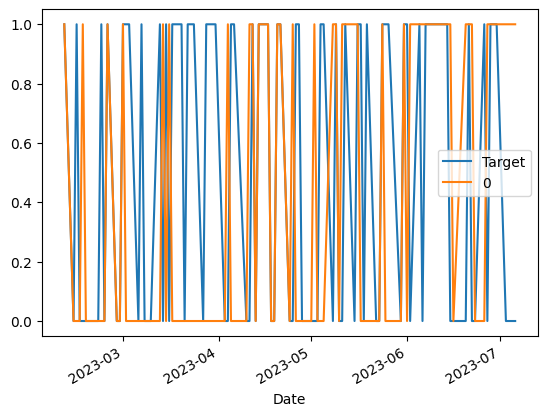

In [72]:
combined.plot()

The orange lines here is our predictions and the blue lines is what actually happened.

## Buliding a Backtesting System

Bactesting involves applying the strategy to past market data to simulate how it would have performed in real-time.

In [73]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [74]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    # This is a list of all the dataframes, where each dataframe is the list of predictions for a single year
    
    # this will make predictions per year, except for the first 10 years
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        #training on all of the years prior to the current year
        test = data.iloc[i:(i+step)].copy()
        #testing will be on the current year
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd. concat(all_predictions)
        
        
#start: Every year has about 250 trading days. Start=2500 signifies that we take a 10 year data. 

In [75]:
predictions = backtest(sp500, model, predictors)

In [76]:
predictions["Predictions"].value_counts()

0    3433
1    2509
Name: Predictions, dtype: int64

The model predicts that the price will go up for around 2500 trading days, and the price will go down for around 3400 trading days.

In [77]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5292945396572339

In [78]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533827
0    0.466173
Name: Target, dtype: float64

## Adding more predictors to our model

In [79]:
horizons = [2,5,60,250,1000]
# seeing if the stock price as compared to today was better 2 days ago, or a week ago, or 2 months ago, or a year ago, or 4 years ago. 

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [80]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1,1.002232,1.0,1.007025,2.0,1.045935,31.0,1.097193,119.0,1.160074,533.0
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1,1.006097,2.0,1.014636,3.0,1.057301,32.0,1.109962,119.0,1.173857,533.0
2023-07-03 00:00:00-04:00,4450.479980,4456.459961,4442.290039,4455.589844,2034280000,4446.819824,0,1.000585,2.0,1.009986,4.0,1.057010,33.0,1.110570,119.0,1.174785,533.0


In [81]:
sp500 = sp500.dropna()
# dropping rows with NAN values

In [82]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1,0.999823,1.0,1.003208,2.0,1.042400,31.0,1.092973,118.0,1.155335,533.0
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1,1.002232,1.0,1.007025,2.0,1.045935,31.0,1.097193,119.0,1.160074,533.0
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1,1.006097,2.0,1.014636,3.0,1.057301,32.0,1.109962,119.0,1.173857,533.0


## Improving our Model

In [88]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [93]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    # we change the above line into getting the probability of the stock price going up or down tomorrow
    # we get the second column of preds, so only the part predicting if the stock price is going up
    
    preds[preds >= .6] = 1
    # if the probability of the stock price going up is greater that 60 percent, only then will we assign the value 1
    
    preds[preds < .6] = 0
    # this will reduce the number of trading days for us where the price will go up, but inturn, it ensures greater chances of the stock price actually going up, when we predict it to go up. 
    # hence we will be able to make lesser, but more efficient trades
    
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [94]:
predictions = backtest(sp500, model, new_predictors)

In [95]:
predictions["Predictions"].value_counts()

0.0    4125
1.0     816
Name: Predictions, dtype: int64

This time, the model predicts that the price will go up for only around 800 days. This is because we increased the threshold value of the model to predict that the stock price will go up.

In [96]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5686274509803921

We know that for around 53% of the trading days, the stock price went up. 
Out of those 53% days, our model predicts 56% of those days correctly, hence profiting over a longer period of time.

for improving the model : 

1. use indices from other side of the world, that does not work on the usual usa trading hours to predict if changes there will be reflected in the s&p500 model
2. Use new and articles
3. Use key components like tech
4. can try increasing the reoulution, like hourly or minute by minute data